### Preliminaries

In [1]:
## perform the necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import recall_score, make_scorer, mean_squared_error, confusion_matrix, precision_score, roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import torch
import time

# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### load Datasets

A) Load the "Dataset.csv" file.

B) Encode the output classes `Label` (0: Normal, 1: Abnormal) and separate inputs and outputs (features and target). (2 pts)

C) Split the data into equals-sized training and test sets. Use a random_state = 42, and ensure the `balanced distribution` of labels when splitting data.  

D) How many observations do you have in your training set?  

E) How many observations for each class in your training set?

F) Z-standarize the input features of the training and test sets.

In [2]:
### Q1A) 
# Read Data 
data = pd.read_csv('Dataset.csv')
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Label
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [4]:
# Encode Output Class

data['Label'] = data['Label'].astype('category')
encode_map = {
    'Abnormal': 1,
    'Normal': 0
}

data['Label'].replace(encode_map, inplace=True)

Xdata = data.drop('Label', axis=1)
ydata = data['Label']

### Q1C) 

Xtrain, Xtest, ytrain, ytest = train_test_split(
    Xdata, ydata, 
    test_size=0.5,       # 50% of the data will be used for testing
    random_state=42,     # Ensures a reproducible split
    stratify=ydata           # Preserve the class distribution in the split
)

print(Xtrain.shape)


print(ytrain.value_counts())

scaler = StandardScaler()
XtrainScaled = scaler.fit_transform(Xtrain)
XtestScaled = scaler.fit_transform(Xtest)

(155, 12)
1    105
0     50
Name: Label, dtype: int64


### Logistic Regression

A) Build a L1-regularized logistic regression model to all the training data, and then get the predicted labels for each item of the test set. Tip: use the 'saga' solver for L1 regularization.

B) Print out the precision, recall, and F1-score of the test set.

C) Print out the model execution time (both training and test time) in milliseconds. Please keep two decimal places.

D) Plot ROC curve and report the area under the ROC curve for the test data set. 


The Logistic Regression Precision is  0.8403361344537815
The Logistic Regression Recall is  0.9523809523809523
The Logistic Regression F1-score is  0.8928571428571429
The Logistic Regression model training time is 6.0 ms
The Logistic Regression model test time is 3.0 ms


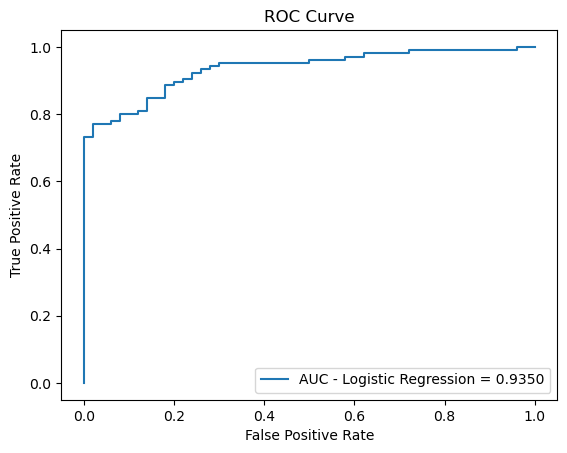

The area under the ROC curve is 0.9350476190476191


In [5]:
model = LogisticRegression(penalty = 'l1', solver='saga')

time1 = time.time()
#fit model 
model.fit(XtrainScaled,ytrain)
time2 = time.time()
#predict labels
ypred = model.predict(XtestScaled)
time3 = time.time()
 
print('The Logistic Regression Precision is ', precision_score(ytest, ypred))
print('The Logistic Regression Recall is ', recall_score(ytest, ypred))
print('The Logistic Regression F1-score is ', f1_score(ytest, ypred))

print('The Logistic Regression model training time is '+ str(round((time2-time1)*1000,2)) + ' ms')
print('The Logistic Regression model test time is '+ str(round((time3-time2)*1000,2)) + ' ms')



prob_estimates = model.predict_proba(XtestScaled)[:, 1]

# Compute ROC AUC
fpr, tpr, thresholds = roc_curve(ytest, prob_estimates)
auc_roc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC - Logistic Regression = {auc_roc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print('The area under the ROC curve is', auc_roc)

### Neural Network 


### Building model

Build a simple neural network model (NN_model1) using PyTorch packages with the features in the data set as the input units and two output units for the two output classes:

* Use a LogSigmoid as your output non-linearity.
* Use the Cross-entropy loss as a training criterion. 
* Use Stochastic gradient descent optimizer with a learning rate of 0.01. 
* Run the optimization for 8000 iterations and record the loss for each iteration. 
* Plot the loss versus iterations.

In [6]:
# Define linear model 
class LinearModel(torch.nn.Module):
    
    def __init__(self, num_features, num_classes):
        
        super().__init__()
        
        # Neural Network Architecture
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=num_classes)
        self.activation = torch.nn.LogSigmoid()
    
    def forward(self, X):
        X = self.dense1(X)
        X = self.activation(X)
        return X

The NN_model1 training time is 1584.52 ms


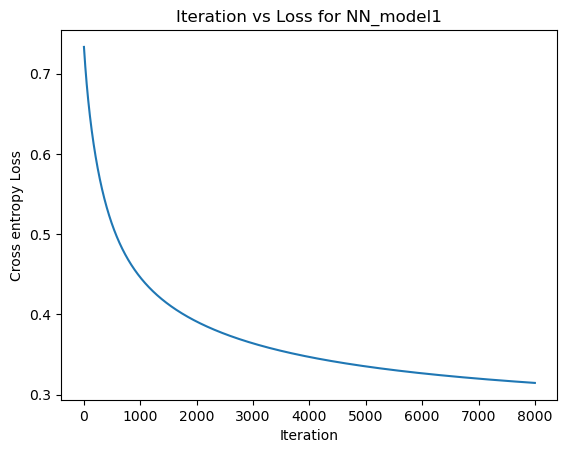

In [7]:
NN_model1 = LinearModel(12,2)
Xt = torch.FloatTensor(XtrainScaled)
yt = torch.LongTensor(ytrain.values)
y_pred = NN_model1.forward(Xt)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(NN_model1.parameters(), lr=1e-2)

max_iter = 8000
lossRecord = np.zeros(max_iter)
time1 = time.time()
for i in range(max_iter):
    # Intialize the gradient 
    optimizer.zero_grad()
    # Get current 
    y_pred = NN_model1.forward(Xt) # Get a forward pass with gradient 
    loss = criterion(input=y_pred, target=yt) # Caluculate the loss  
    lossRecord[i]=loss
    loss.backward() # propagate the derivative backwards 
    optimizer.step() # Take one updating step
time2 = time.time()
plt.plot(np.arange(max_iter),lossRecord)
plt.xlabel('Iteration')
plt.ylabel('Cross entropy Loss')
plt.title('Iteration vs Loss for NN_model1')


print('The NN_model1 training time is '+ str(round((time2-time1)*1000,2)) + ' ms')

### Prediction 

Now use your trained model (NN_model1) to make predictions on the test set.

A) Print out the precision, recall, and F1-score of the test set.

B) Print out the model execution time (both training and test time) in milliseconds. Please keep two decimal places.

C) Plot ROC curve and report the area under the ROC curve for the test data set. 

The NN_model1 Precision is  0.8290598290598291
The NN_model1 Recall is  0.9238095238095239
The NN_model1 F1-score is  0.8738738738738739
The NN_model1 test time is 0.99 ms


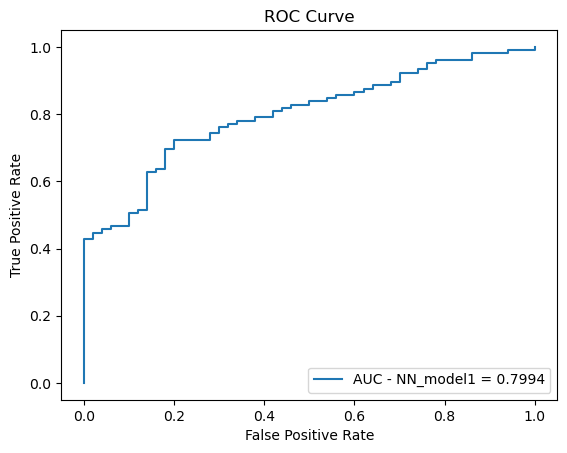

The area under the ROC curve is 0.7994285714285714


In [11]:
Xtt = torch.FloatTensor(XtestScaled)
time1 = time.time()
with torch.no_grad():
    y_pred = NN_model1(Xtt)
time2 = time.time()

yp = y_pred.argmax(dim=1).numpy()  # Convert to class indices
print('The NN_model1 Precision is ', precision_score(ytest, yp))
print('The NN_model1 Recall is ', recall_score(ytest, yp))
print('The NN_model1 F1-score is ', f1_score(ytest, yp))


print('The NN_model1 test time is '+ str(round((time2-time1)*1000,2)) + ' ms')

    
    
    

yprob = y_pred.numpy()[:, 1]  # Probabilities for the positive class    
fpr, tpr, thresholds = roc_curve(ytest, yprob)
auc_roc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC - NN_model1 = {auc_roc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print('The area under the ROC curve is', auc_roc)

### Adding hidden layers
Change the neural network (NN_model2) and add two hidden layers with 100 and 60 units, respectively. Use the LogSigmoid non-linearity for the hidden layers. Leave all the other parameters the same as for Question 3a. Again train for 8000 iterations and plot the loss as a function of the iteration. 

The NN_model2 training time is 5788.51 ms


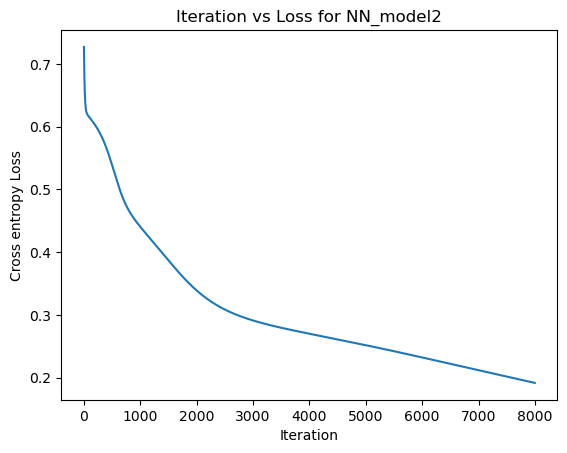

In [12]:
class NonLinearModel(torch.nn.Module):
    
    def __init__(self, num_features, num_classes):
        
        super().__init__()
        
        # Neural Network Architecture: 
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=100)
        self.activation1 = torch.nn.LogSigmoid()
        self.dense2 = torch.nn.Linear(in_features=100, out_features=60)
        self.activation2 = torch.nn.LogSigmoid()
        self.dense3 = torch.nn.Linear(in_features=60, out_features=num_classes)
        self.activation3 = torch.nn.LogSigmoid()
        
    def forward(self, X):
        X = self.dense1(X)  
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.activation2(X)
        X = self.dense3(X)
        X = self.activation3(X)
        return X

NN_model2 = NonLinearModel(12,2)
y_pred = NN_model2.forward(Xt)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(NN_model2.parameters(), lr=1e-2)

max_iter = 8000
lossRecord = np.zeros(max_iter)
time1 = time.time()
for i in range(max_iter):
    # Intialize the gradient 
    optimizer.zero_grad()
    # Get current 
    y_pred = NN_model2.forward(Xt) # Get a forward pass with gradient 
    loss = criterion(input=y_pred, target=yt) # Caluculate the loss  
    lossRecord[i]=loss
    loss.backward() # propagate the derivative backwards 
    optimizer.step() # Take one updating step
time2 = time.time()
plt.plot(np.arange(max_iter),lossRecord)
plt.xlabel('Iteration')
plt.ylabel('Cross entropy Loss')
plt.title('Iteration vs Loss for NN_model2')

print('The NN_model2 training time is '+ str(round((time2-time1)*1000,2)) + ' ms')

### Prediction and model selection
Now use your trained model in Question 3c (NN_model2) to make predictions on the test set.

A) Print out the precision, recall, and F1-score of the test set.

B) Print out the model execution time (both training and test time) in milliseconds. Please keep two decimal places.

C) Plot ROC curve and report the area under the ROC curve for the test data set. 


The NN_model2 Precision is  0.808695652173913
The NN_model2 Recall is  0.8857142857142857
The NN_model2 F1-score is  0.8454545454545455
The NN_model2 test time is 1.0 ms


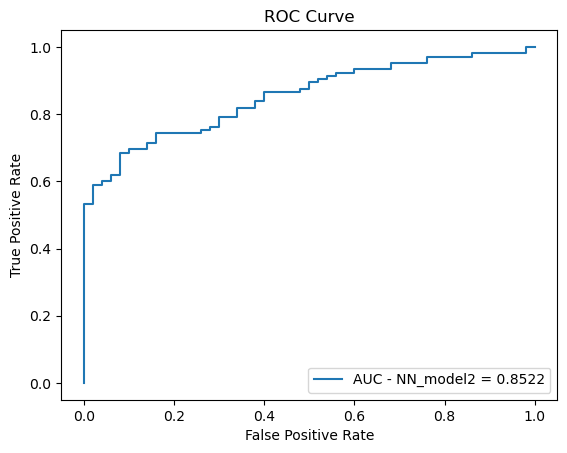

The area under the ROC curve is 0.8521904761904762


In [19]:
Xtt = torch.FloatTensor(XtestScaled)
time1 = time.time()
with torch.no_grad():
    y_pred = NN_model2(Xtt)
time2 = time.time()

yp = y_pred.argmax(dim=1).numpy()  # Convert to class indices
print('The NN_model2 Precision is ', precision_score(ytest, yp))
print('The NN_model2 Recall is ', recall_score(ytest, yp))
print('The NN_model2 F1-score is ', f1_score(ytest, yp))

 
print('The NN_model2 test time is '+ str(round((time2-time1)*1000,2)) + ' ms')    


yprob = y_pred.numpy()[:, 1]  # Probabilities for the positive class    
fpr, tpr, thresholds = roc_curve(ytest, yprob)
auc_roc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC - NN_model2 = {auc_roc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print('The area under the ROC curve is', auc_roc)

Making the network deeper does not necessarily improve the performance but increases the execution time. However, we need to check their generalization performance to decide if depth and nonlinearity are required.
Logistic regresssion will be the choice for this dataset and problem, especially if we have limited resources for training.